In [33]:
import numpy as np
from fgivenx import plot_contours, samples_from_getdist_chains
from linf import AdaptiveLinf
import matplotlib.pyplot as plt

In [68]:
k_min = 1e-6
k_max = 10
k_pivot = 0.05
logks = np.linspace(np.log(k_min), np.log(k_max), 100)

def pofk_linf(logk, theta):
    return AdaptiveLinf(np.log(k_min/k_pivot), np.log(k_max/k_pivot))(logk - np.log(k_pivot), theta)

In [69]:
samples, weights = samples_from_getdist_chains(["N", "lnP0", "lnP1"], "runs/linf_v3_pofk/linf_v3_pofk") # working here!!!!!)

  0%|          | 0/638 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

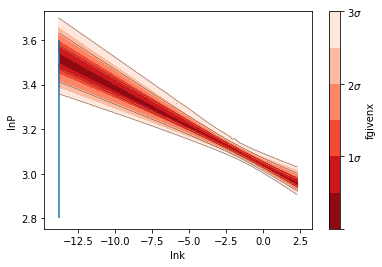

In [70]:
fig, ax = plt.subplots()
cbar = plot_contours(pofk_linf, logks, samples, weights=weights, ax=ax)
cbar = plt.colorbar(cbar, ticks = [0,1,2,3], label="fgivenx", ax = ax)
cbar.set_ticklabels(["", r"$1\sigma$", r"$2\sigma$", r"$3\sigma$"])
ax.set(xlabel="lnk", ylabel="lnP", xlim=(np.log(k_min)-1, np.log(k_max)+1))
ax.vlines(np.log(k_min), 2.8, 3.6)
plt.show()


In [49]:
np.max(samples[:, 0])

2.9997562

[2.748207  3.0575096 3.1647052]


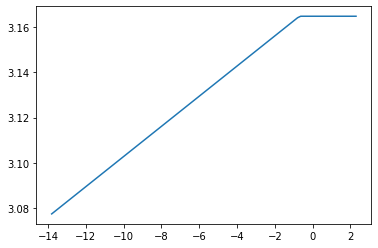

In [67]:
sample = samples[7]
print(sample)
plt.plot(logks, pofk_linf(logks, sample))
plt.show()

In [54]:
np.log(k_pivot)

-2.995732273553991